## **Payout functions and hedge combination strategies**

This notebook deomonstrates a way of graphing the total payout of a hedge strategy based on the price at which you close out your hedge. It also explores combined strategies which have the aim of creating a portfolio which is profitable if the price moves in any direction. Combination strategies are found to be ineffective.

### 1. Payout functions

To create an option-like payout graph, we first need payout functions fixing all variables but the price at which the second bet is taken. 
These functions are defined *given* the optimal stake of the second bet and are found by substituting ls* or bs* into the win side/loss side payout functions.

In [2]:
def payout_back_to_lay(bp, bs, lp, c):
    return - bs + (((bp - 1) * bs * (1 - c) + bs) * (1 - c)) / (lp - c)

def payout_lay_to_back(bp, lp, ls, c):
    return (- ls * (lp - c))/(bp * (1 - c) + c) + ls * (1 - c) 

These functions when graphed show the payouts for each hedge strategy as the price of the second half of the bet changes. **The initial bets of each hedge are at a price of 3 and a stake of 10.**

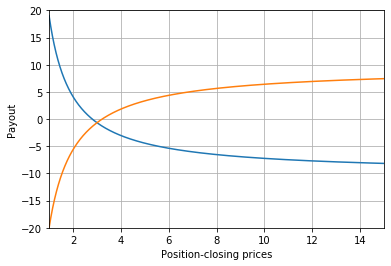

In [3]:
import matplotlib.pyplot as plt
import numpy as np

#Set your prices, stakes and c for first bet for the example plot. Ls/bs is optimal, lp/bp is the second bet price, which is allowed to vary.
lp = np.arange(1.0, 25.0, 0.01)
payout_b_t_l = payout_back_to_lay(3, 10, lp, 0.05) 
bp = np.arange(1.0, 25.0, 0.01)
payout_l_t_b = payout_lay_to_back(bp, 3, 10, 0.05)

fig, ax = plt.subplots()
ax.plot(lp, payout_b_t_l)
ax.plot(bp, payout_l_t_b)
ax.set_ylim([-20,20])
ax.set_xlim([1.01,15]) #minimum price is 1.01
ax.set(xlabel='Position-closing prices', ylabel='Payout')
ax.grid()

plt.show()

This graph shows that as prices tend to the extremes, the profits and losses tend to the win side payout and loss side payouts: 
* a back_to_lay hedge has profit $\to$ `(bp - 1) * bs * (1 - c)` as `lp`$\to$ 1.00, and loss $\to$ `-bs` as `lp` $\to$ $\infty$
* a lay_to_back hedge has loss $\to$ `- ls * (lp - 1)` as `bp` $\to$ 1.00, and profit $\to$ `ls* (1 - c)` as `bp` $\to$ $\infty$.

It is interesting to note the rate of change in the payout (looking at the profitable sides only) as the price departs from that of the original position. 

### 2. Intro to combination strategies

The aim of a combination strategy is to restrict the above bets so that only the portion of the payout above 0 remains on either side.

Suppose you combine each strategy as is. Your strategy is unprofitable, since the profitable side of one hedge is always smaller than the loss side of the other hedge at all prices due to commission. You can see why this is when looking at the payouts at the limits of 1 and infinity.

With our prices and stakes, as price $\to$ `1.00`, the back-to-lay hedge profit $\to$ `(bp - 1) * bs * (1 -c) = (3 - 1) * 10 * (1 - 0.05) = 19` and the lay-to-back hedge loss $\to$ `- ls * (lp - 1) = - 10 * (3 - 1) = - 20`, totalling `-1`. As price $\to$ $\infty$, the back-to-lay hedge loss $\to$ `-bs = - 10` while the lay-to-back profit $\to$ `ls * (1 - c) = 10 * (1 - 0.05) = 9.5`, totalling `- 0.5`. 

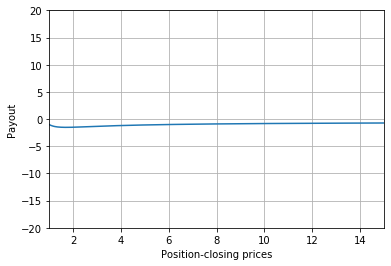

In [4]:
p = np.arange(1.0, 25.0, 0.01)
payout_combined = payout_back_to_lay(3, 10, p, 0.05) + payout_lay_to_back(p, 3, 10, 0.05)

fig, ax = plt.subplots()
ax.plot(p, payout_combined)
ax.set_ylim([-20,20])
ax.set_xlim([1.01,15])
ax.set(xlabel='Position-closing prices', ylabel='Payout')
ax.grid()

plt.show()

We want a strategy where we have as much of the profitable parts of both hedge positions, while having a payoff graph that is a line with no breaks. This will mean that all possible scenarios are covered. When the original bets were made at the same price, they intersect at that price, in this case, 3.

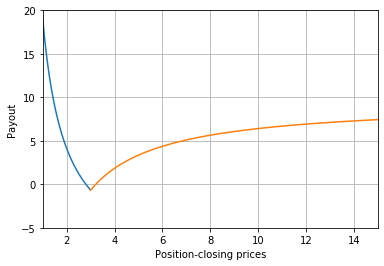

In [5]:
lp = np.arange(1.0, 3, 0.01)
payout_b_t_l = payout_back_to_lay(3, 10, lp, 0.05)
bp = np.arange(3, 25.0, 0.01)
payout_l_t_b = payout_lay_to_back(bp, 3, 10, 0.05)

fig, ax = plt.subplots()
ax.plot(lp, payout_b_t_l)
ax.plot(bp, payout_l_t_b)
ax.set_ylim([-5,20])
ax.set_xlim([1.01,15])
ax.set(xlabel='Position-closing prices', ylabel='Payout')
ax.grid()

plt.show()

How can this be implemented? This would require you to be able to confidently close out one of the hedges while keeping the other open, or in other words, would require you to be very confident about the direction of the price move.

If we can find a reliable indicator of the direction of a price move before it occurs in full (perhaps relating to the volume of betting), if you are able to close out one position quick enough based on that indicator, you will be able to take advantage of the price move.

However, there is little point in adopting this strategy. With such information you could implement the first bet at the current price and the second bet a price to which the market will move, avoiding the need for the combined strategy. The graph does, however, still illustrate the possible profit of that strategy. Your hedge would end somewhere on the blue or orange lines.



### 3. Do combination strategies work?

Could you get the whole graph above a payout of 0? We would want to shift one or both of the lines upwards such that they intersect above 0. Experimenting with stakes will show that a larger stake stretches each graph vertically. Therefore, there must be a change in the prices at which bets are excecuted. 

The example below was found by trial and error with different values for the prices of the two initial bets and a new stop loss where the two functions are roughly equal. It assumes that the back-to-lay hedge started at `bp = 4` and the lay-to-back hedge started at `ls = 3`, then the strategies intersect at `p = 3.5`, the midpoint. 

The two strategies would have to be implemented sequentially after a fall in the price. Under such a situation, a back-to-lay bet would have already been profitable, meaning that the combined strategy is not worthwhile.

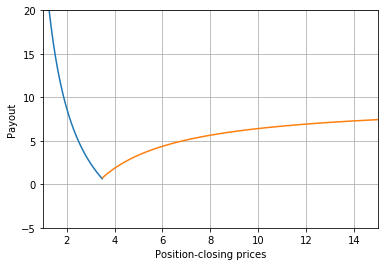

In [10]:
lp = np.arange(1.0, 3.5, 0.01)
payout_b_t_l = payout_back_to_lay(4, 10, lp, 0.05)
bp = np.arange(3.5, 25.0, 0.01)
payout_l_t_b = payout_lay_to_back(bp, 3, 10, 0.05)

fig, ax = plt.subplots()
ax.plot(lp, payout_b_t_l)
ax.plot(bp, payout_l_t_b)
ax.set_ylim([-5,20])
ax.set_xlim([1.01,15])
ax.set(xlabel='Position-closing prices', ylabel='Payout')
ax.grid()

plt.show()